### Basic EDA

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

In [2]:
#Load the dataset and display the first 5 rows.
df= pd.read_csv("DataSets/ai_assistant_usage_student_life.csv.xls")
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [3]:
#Check the dataset shape (rows, columns)
df.shape

(10000, 11)

In [4]:
#vDisplay column names and their data types.
#df.columns.to_list- Gives the Names of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


In [5]:
#Check for missing values in each column.
df.isnull().sum()

SessionID             0
StudentLevel          0
Discipline            0
SessionDate           0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64

In [6]:
#Show summary statistics for SessionLengthMin and TotalPrompts.
df[["SessionLengthMin", "TotalPrompts"]].describe().T

,count,mean,std,min,25%,50%,75%,max
SessionLengthMin,10000.0,19.846467,13.897302,0.03,9.63,16.65,26.67,110.81
TotalPrompts,10000.0,5.607500,4.648764,1.00,2.00,4.00,8.00,39.00


In [7]:
#Find the number of unique values in StudentLevel, Discipline, and TaskType.
print("Student Level" , df["StudentLevel"].nunique(), df["StudentLevel"].unique())
print("\n Discipline" , df["Discipline"].nunique(), df["Discipline"].unique())
print("\n Task Type" , df["TaskType"].nunique(), df["TaskType"].unique())

Student Level 3 ['Undergraduate' 'Graduate' 'High School']

 Discipline 7 ['Computer Science' 'Psychology' 'Business' 'Biology' 'Math' 'History'
 'Engineering']

 Task Type 6 ['Studying' 'Coding' 'Writing' 'Brainstorming' 'Homework Help' 'Research']


In [8]:
#Which TaskType is the most common?
print([df["TaskType"].value_counts().idxmax()])
print("\n", df["TaskType"].value_counts())


['Writing']

 TaskType
Writing          3101
Studying         2040
Homework Help    1959
Coding           1948
Brainstorming     476
Research          476
Name: count, dtype: int64


In [9]:
#alculate the average SessionLengthMin for each StudentLevel.
df.groupby("StudentLevel")["SessionLengthMin"].mean()

StudentLevel
Graduate         20.252236
High School      20.023740
Undergraduate    19.650943
Name: SessionLengthMin, dtype: float64

### Visualization

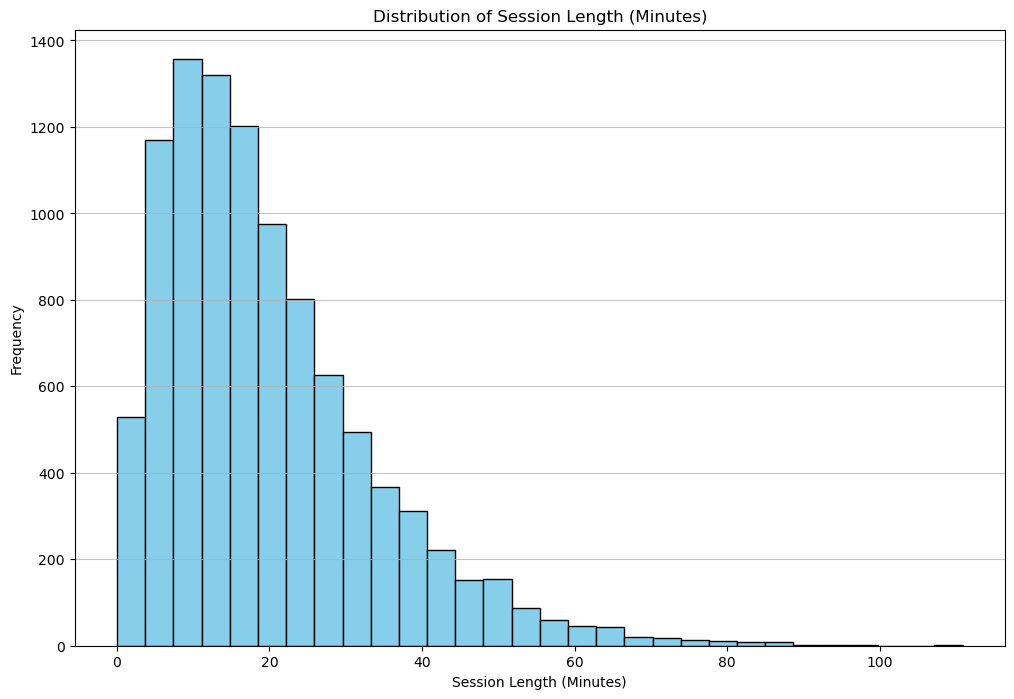

In [10]:
#Plot a histogram of SessionLengthMin.
#using matplotlib
plt.figure(figsize=(12,8))
plt.hist(df["SessionLengthMin"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Session Length (Minutes)")   
plt.xlabel("Session Length (Minutes)")
plt.ylabel("Frequency") 
plt.grid(axis="y", alpha=0.75)
plt.show()

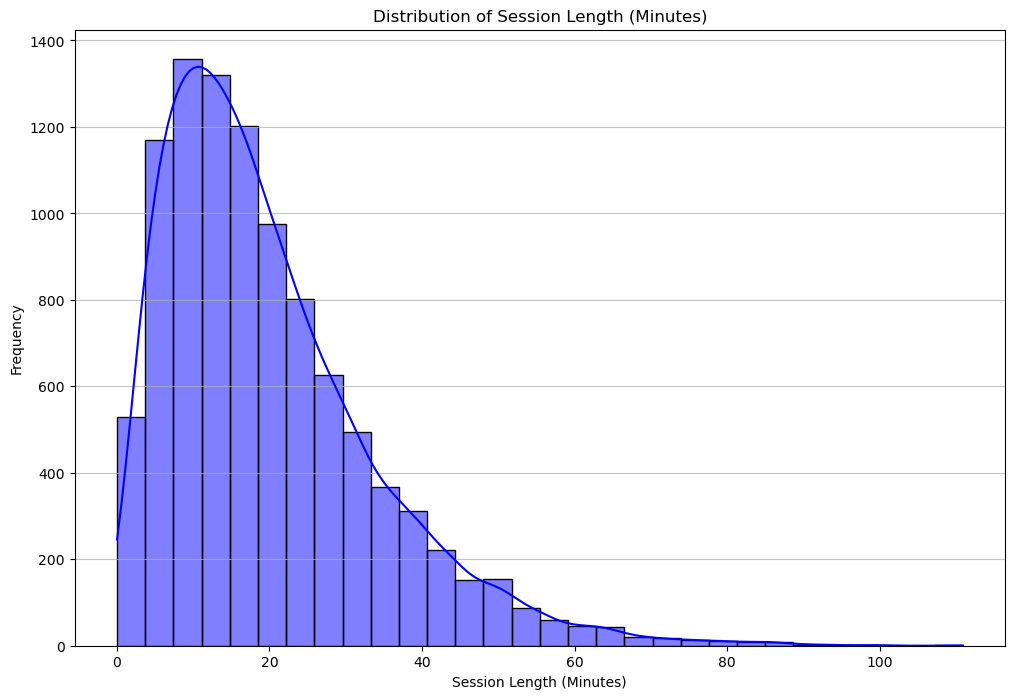

In [11]:
#Using seaborn
plt.figure(figsize=(12,8))
sns.histplot(df["SessionLengthMin"], bins=30, kde=True, color="blue")
plt.title("Distribution of Session Length (Minutes)")   
plt.xlabel("Session Length (Minutes)")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)
plt.show()


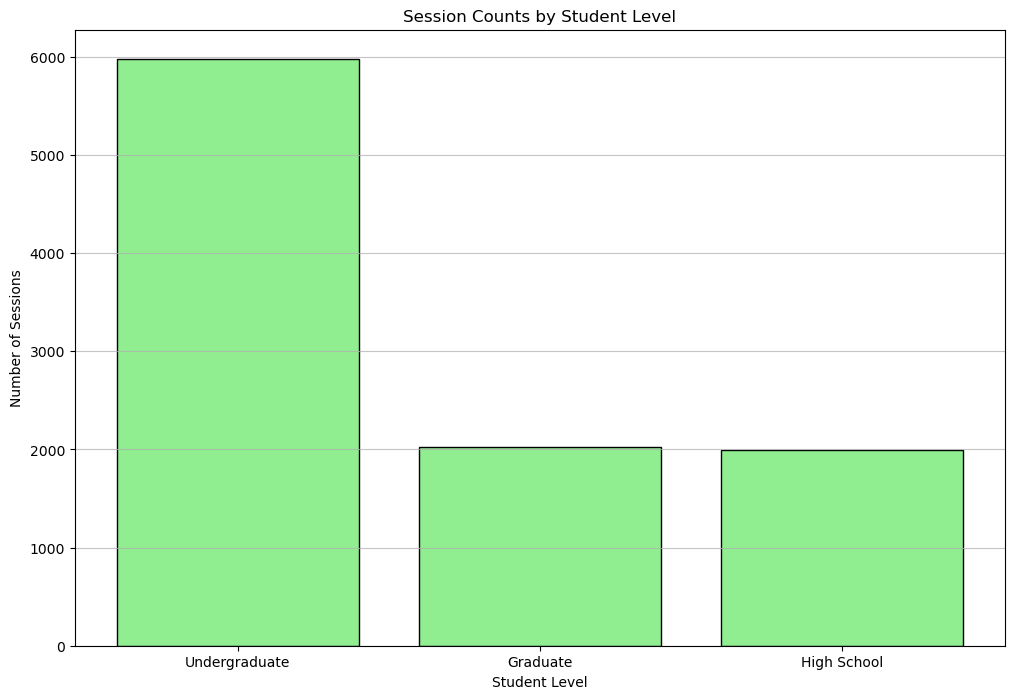

In [12]:
#Create a bar chart of session counts by StudentLevel.
#Using matplotlib
plt.figure(figsize=(12,8))  
plt.bar(df["StudentLevel"].unique(), df["StudentLevel"].value_counts().values, color="lightgreen", edgecolor="black")
plt.title("Session Counts by Student Level")    
plt.xlabel("Student Level")
plt.ylabel("Number of Sessions")    
plt.grid(axis="y", alpha=0.75)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_12812\1157754604.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="StudentLevel", palette="viridis", order=df["StudentLevel"].value_counts().index)


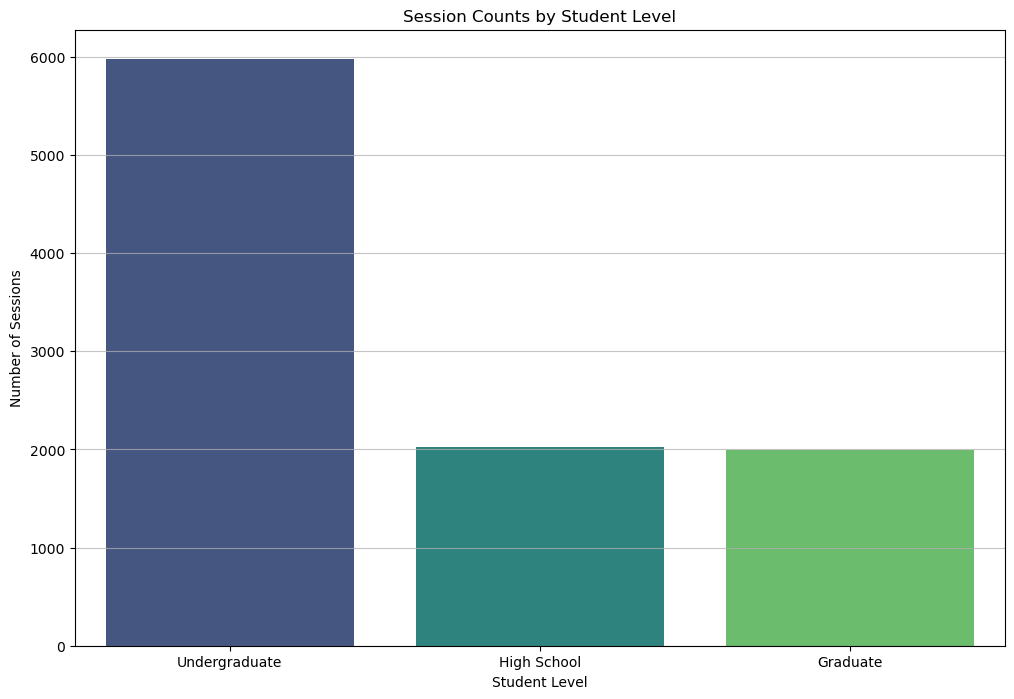

In [13]:
#using sns
plt.figure(figsize=(12,8))
sns.countplot(data=df, x="StudentLevel", palette="viridis", order=df["StudentLevel"].value_counts().index)
plt.title("Session Counts by Student Level")
plt.xlabel("Student Level")
plt.ylabel("Number of Sessions")
plt.grid(axis="y", alpha=0.75)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_12812\2576410472.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="TaskType", palette="viridis", order=df["TaskType"].value_counts().index)


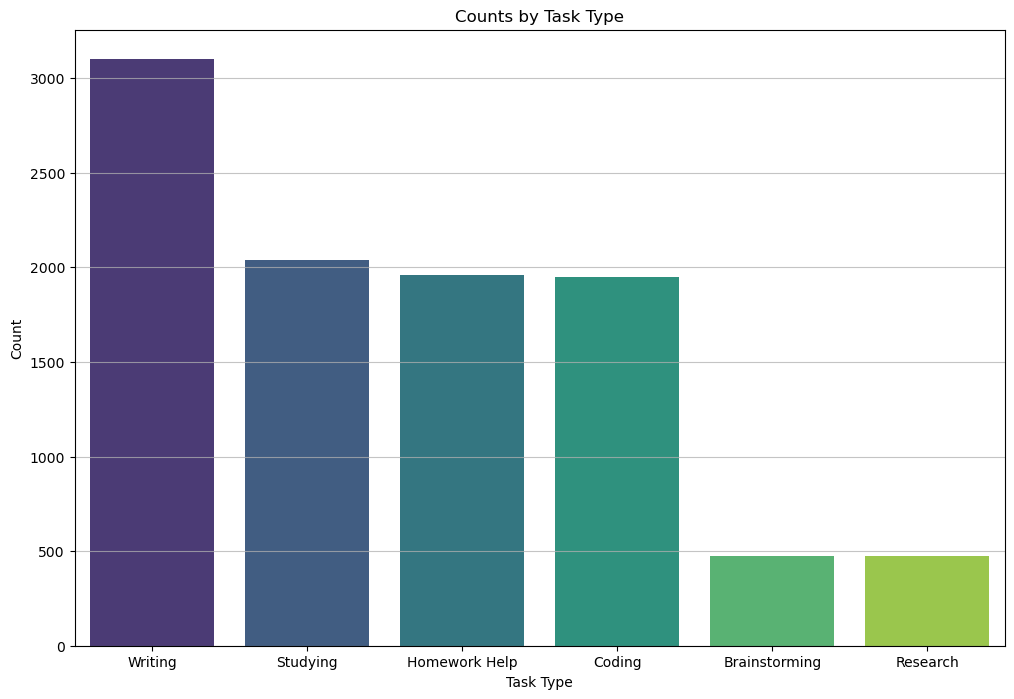

In [14]:
#Make a countplot of TaskType using Seaborn.
plt.figure(figsize=(12,8))
sns.countplot(data=df, x="TaskType", palette="viridis", order=df["TaskType"].value_counts().index)
plt.title("Counts by Task Type")
plt.xlabel("Task Type")
plt.ylabel("Count")
plt.grid(axis="y", alpha=0.75)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_12812\1456362677.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="StudentLevel", y="SessionLengthMin", palette="Set2")


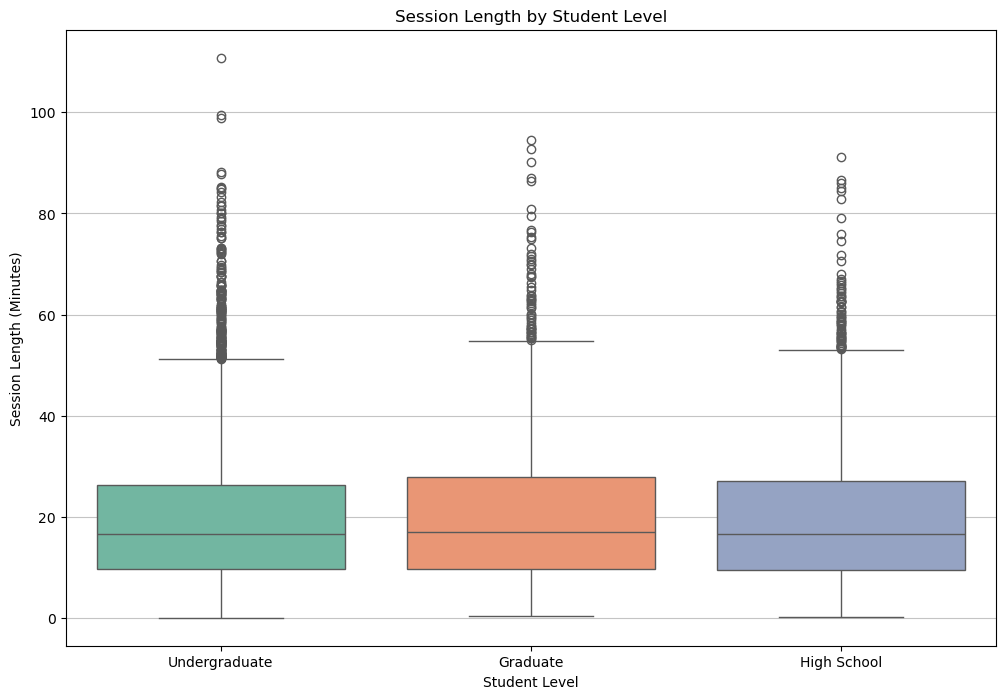

In [15]:
#Plot a boxplot of SessionLengthMin grouped by StudentLevel.
#using sns
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="StudentLevel", y="SessionLengthMin", palette="Set2")
plt.title("Session Length by Student Level")    
plt.xlabel("Student Level")
plt.ylabel("Session Length (Minutes)")
plt.grid(axis="y", alpha=0.75)
plt.show()

<Figure size 1200x800 with 0 Axes>

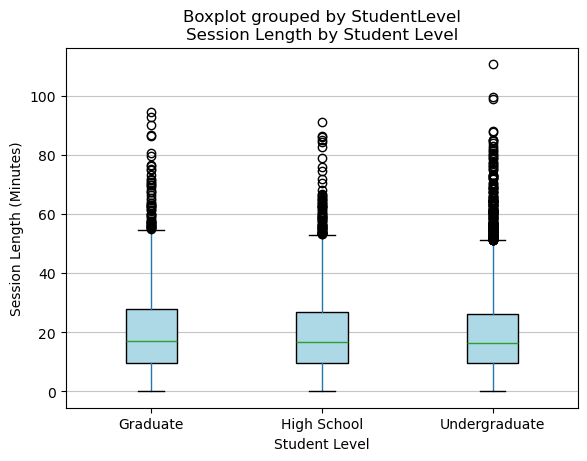

In [16]:
#using matplotlib
plt.figure(figsize=(12,8))
df.boxplot(column="SessionLengthMin", by="StudentLevel", grid=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Session Length by Student Level")
plt.xlabel("Student Level")
plt.ylabel("Session Length (Minutes)")
plt.grid(axis="y", alpha=0.75)  
plt.show()

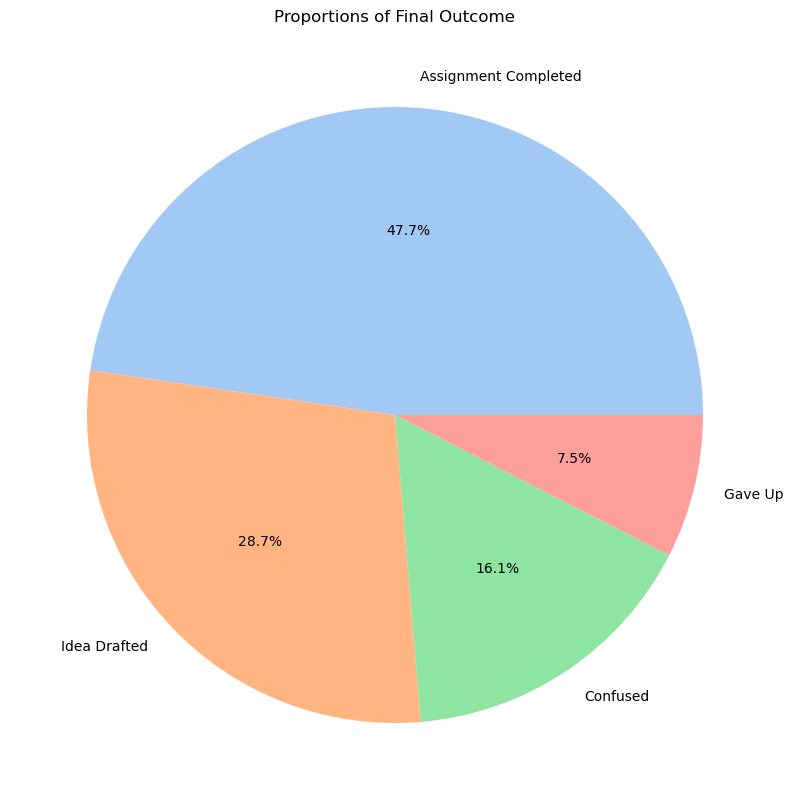

In [17]:
#Create a pie chart showing proportions of FinalOutcome.
#Using matplotlib
plt.figure(figsize=(10,10))
plt.pie(df["FinalOutcome"].value_counts(), labels=df["FinalOutcome"].value_counts().index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Proportions of Final Outcome")
plt.show()

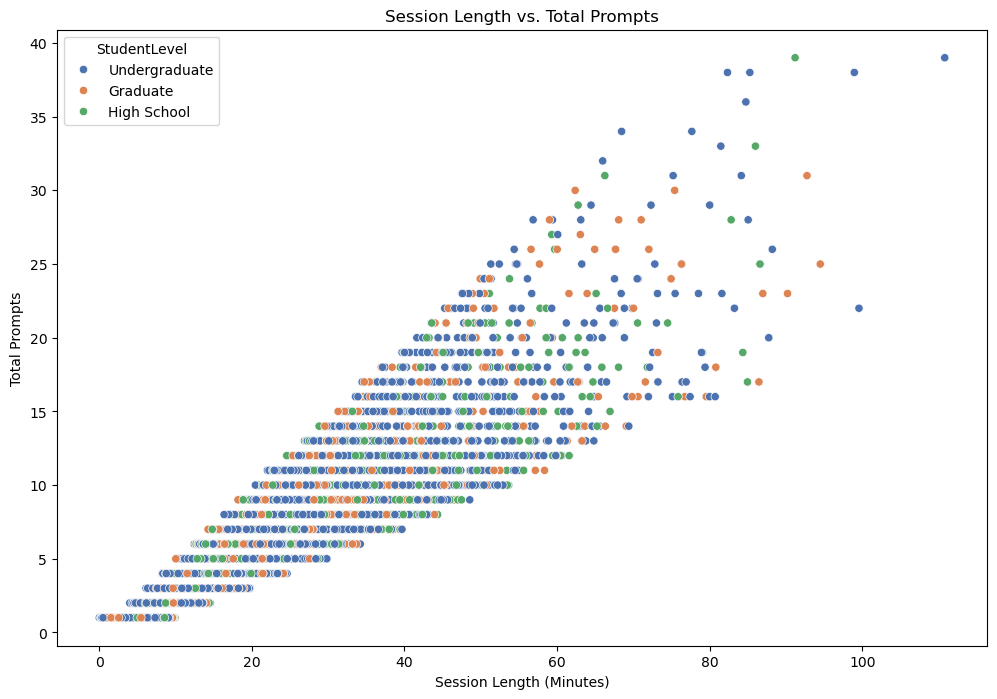

In [18]:
#Draw a scatterplot of SessionLengthMin vs. TotalPrompts.
#using sns
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="SessionLengthMin", y="TotalPrompts", hue="StudentLevel", palette="deep")
plt.title("Session Length vs. Total Prompts")
plt.xlabel("Session Length (Minutes)")
plt.ylabel("Total Prompts")
plt.show()


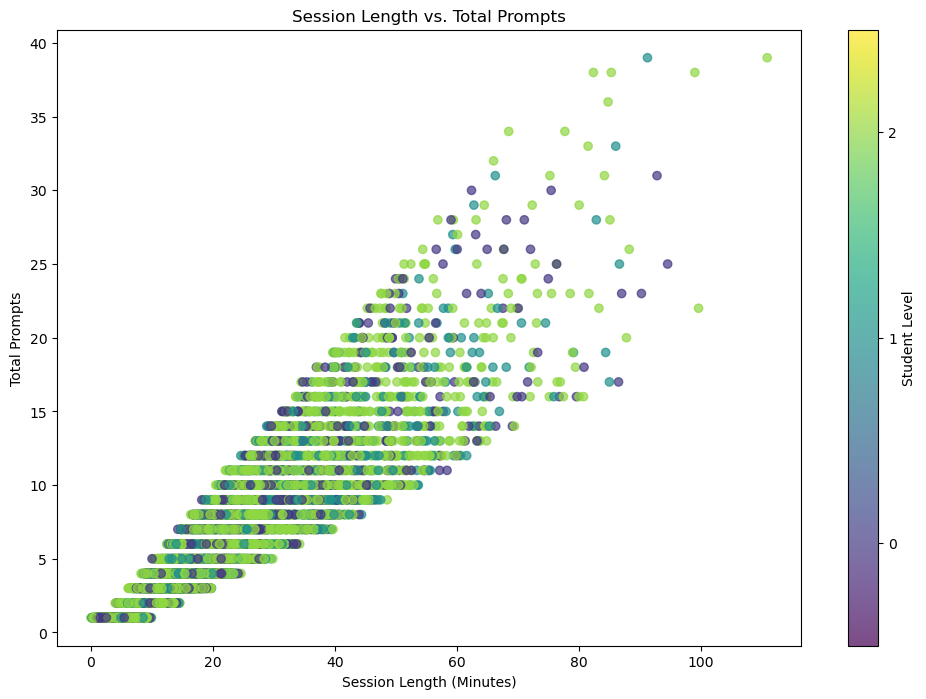

In [19]:
#Using matplotlib
plt.figure(figsize=(12,8))
plt.scatter(df["SessionLengthMin"], df["TotalPrompts"], c=pd.Categorical(df["StudentLevel"]).codes, cmap="viridis", alpha=0.7)
plt.colorbar(ticks=range(len(df["StudentLevel"].unique())), label="Student Level")
plt.clim(-0.5, len(df["StudentLevel"].unique())-0.5)
plt.title("Session Length vs. Total Prompts")
plt.xlabel("Session Length (Minutes)")
plt.ylabel("Total Prompts")
plt.show()

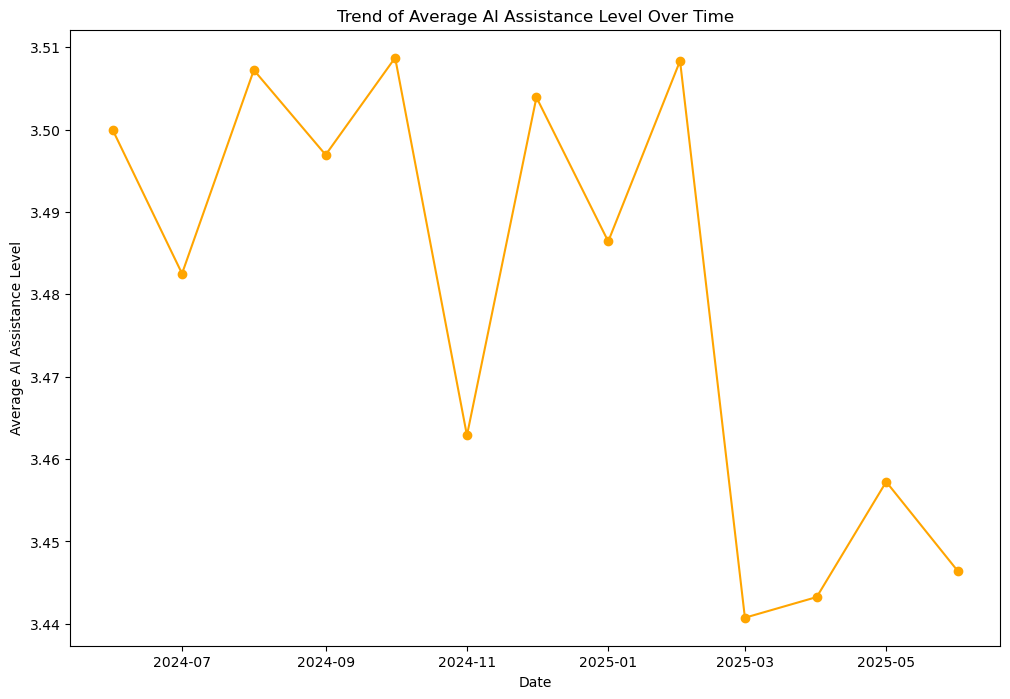

In [20]:
#Plot a line chart of average AI_AssistanceLevel over time (SessionDate)
#Convert SessionDate to datetime
df["SessionDate"] = pd.to_datetime(df["SessionDate"])
#Plot a line chart of average AI_AssistanceLevel over time (SessionDate)
plt.figure(figsize=(12,8))
plt.plot(df.groupby(df["SessionDate"].dt.to_period("M"))["AI_AssistanceLevel"].mean().index.to_timestamp(), df.groupby(df["SessionDate"].dt.to_period("M"))["AI_AssistanceLevel"].mean().values, marker='o', color='orange')
plt.title("Trend of Average AI Assistance Level Over Time")
plt.xlabel("Date")
plt.ylabel("Average AI Assistance Level")
plt.show()

['SessionLengthMin', 'TotalPrompts', 'AI_AssistanceLevel', 'SatisfactionRating']


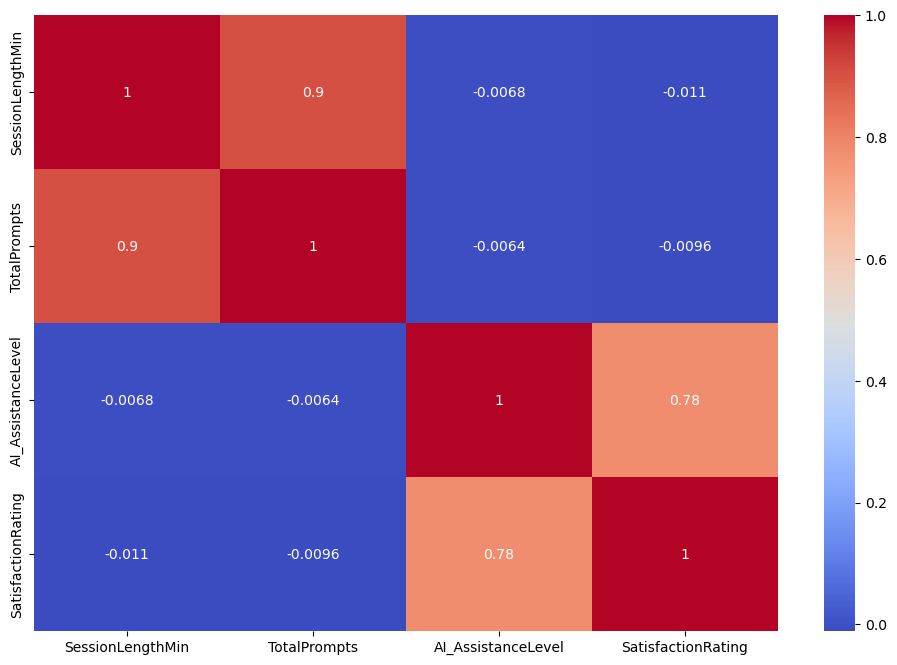

In [21]:
#Create a heatmap of correlations among numeric features.
number_cols= df.select_dtypes(include=np.number)
print(number_cols.columns.tolist())

plt.figure(figsize=(12,8))
sns.heatmap(number_cols.corr(), annot=True, cmap="coolwarm")
plt.show()

### GroupBy & Aggregations

In [22]:
#Find the average SessionLengthMin for each TaskType.
df.groupby("TaskType")["SessionLengthMin"].mean()

TaskType
Brainstorming    21.964223
Coding           19.467659
Homework Help    19.940536
Research         20.410000
Studying         19.705917
Writing          19.705888
Name: SessionLengthMin, dtype: float64

In [23]:
#Which Discipline had the most sessions?
print("Discipline with most counts=", df["Discipline"].value_counts().idxmax())
print("\n", df["Discipline"].value_counts())

Discipline with most counts= Biology

 Discipline
Biology             1458
Computer Science    1445
Engineering         1430
Math                1422
Psychology          1418
History             1417
Business            1410
Name: count, dtype: int64


In [24]:
#Compare average AI_AssistanceLevel across StudentLevel.
df.groupby("StudentLevel")["AI_AssistanceLevel"].mean()

StudentLevel
Graduate         3.469674
High School      3.477060
Undergraduate    3.483607
Name: AI_AssistanceLevel, dtype: float64

In [25]:
#Find the most common FinalOutcome for Graduate students.
#df[df["StudentLevel"]=="Graduate"]["FinalOutcome"].value_counts().idxmax()
print("Most common Final outcome=", df.groupby("StudentLevel")["FinalOutcome"].value_counts().loc["Graduate"].idxmax())

print("\n", df.groupby("StudentLevel")["FinalOutcome"].value_counts())


Most common Final outcome= Assignment Completed

 StudentLevel   FinalOutcome        
Graduate       Assignment Completed     936
               Idea Drafted             567
               Confused                 331
               Gave Up                  161
High School    Assignment Completed     948
               Idea Drafted             597
               Confused                 335
               Gave Up                  147
Undergraduate  Assignment Completed    2884
               Idea Drafted            1702
               Confused                 947
               Gave Up                  445
Name: count, dtype: int64


In [26]:
#Sum of assignments completed
# df[df["FinalOutcome"]=="Assignment Completed"].sum()

In [27]:
#Calculate the median SessionLengthMin for each FinalOutcome.
df.groupby("FinalOutcome")["SessionLengthMin"].median()


FinalOutcome
Assignment Completed    16.570
Confused                16.040
Gave Up                 17.290
Idea Drafted            17.085
Name: SessionLengthMin, dtype: float64

### Feature Engineering & Encoding

In [28]:
#Importing libraries for Feature Engineering & Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [29]:
#Convert SessionDate into Year, Month, and Day columns
#Convert SessionDate to datetime
df["SessionDate"] = pd.to_datetime(df["SessionDate"])
df["Year"] = df["SessionDate"].dt.year
df["Month"] = df["SessionDate"].dt.month
df["Day"] = df["SessionDate"].dt.day
df[["SessionDate", "Year", "Month", "Day"]].head()

,SessionDate,Year,Month,Day
0,2024-11-03,2024,11,3
1,2024-08-25,2024,8,25
2,2025-01-12,2025,1,12
3,2025-05-06,2025,5,6
4,2025-03-18,2025,3,18


In [30]:
#Encode StudentLevel using Label Encoding.
# Label Encoding
le = LabelEncoder()
df["StudentLevel_LE"] = le.fit_transform(df["StudentLevel"])


In [31]:
# One-Hot Encoding
df_onehot = pd.get_dummies(df["TaskType"], prefix="TaskType")
df = pd.concat([df, df_onehot], axis=1)
df.head()


,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,...,Year,Month,Day,StudentLevel_LE,TaskType_Brainstorming,TaskType_Coding,TaskType_Homework Help,TaskType_Research,TaskType_Studying,TaskType_Writing
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,...,2024,11,3,2,False,False,False,False,True,False
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,...,2024,8,25,2,False,False,False,False,True,False
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,...,2025,1,12,2,False,True,False,False,False,False
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,...,2025,5,6,2,False,True,False,False,False,False
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,...,2025,3,18,2,False,False,False,False,False,True


In [32]:
#df= df.drop(["StudentLevel_Graduate", "StudentLevel_High School", "StudentLevel_Undergraduate"], axis=1)
#df.head()

In [33]:
#Create a new feature: PromptsPerMinute = TotalPrompts / SessionLengthMin.
df["PromptsPerMinute"] = df["TotalPrompts"] / df["SessionLengthMin"]
df[["TotalPrompts", "SessionLengthMin", "PromptsPerMinute"]].head()

,TotalPrompts,SessionLengthMin,PromptsPerMinute
0,11,31.20,0.352564
1,6,13.09,0.458365
2,5,19.22,0.260146
3,1,3.70,0.270270
4,9,28.12,0.320057


In [34]:
#Bin SessionLengthMin into categories: Short, Medium, Long.
bins = [0, 10, 30, np.inf]
labels = ["Short", "Medium", "Long"]
df["SessionLengthCategory"] = pd.cut(df["SessionLengthMin"], bins=bins, labels=labels)
df[["SessionLengthMin", "SessionLengthCategory"]].head()

,SessionLengthMin,SessionLengthCategory
0,31.20,Long
1,13.09,Medium
2,19.22,Medium
3,3.70,Short
4,28.12,Medium


### Machine Learning (Classification Models)

In [35]:
#Import librraries for Machine Learning
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
#import optuna
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd


In [36]:
!pip install xgboost

                      precision    recall  f1-score   support

Assignment Completed       0.47      0.99      0.63       930
            Confused       1.00      0.00      0.01       349
             Gave Up       0.00      0.00      0.00       170
        Idea Drafted       0.18      0.01      0.01       551

            accuracy                           0.46      2000
           macro avg       0.41      0.25      0.16      2000
        weighted avg       0.44      0.46      0.30      2000



c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


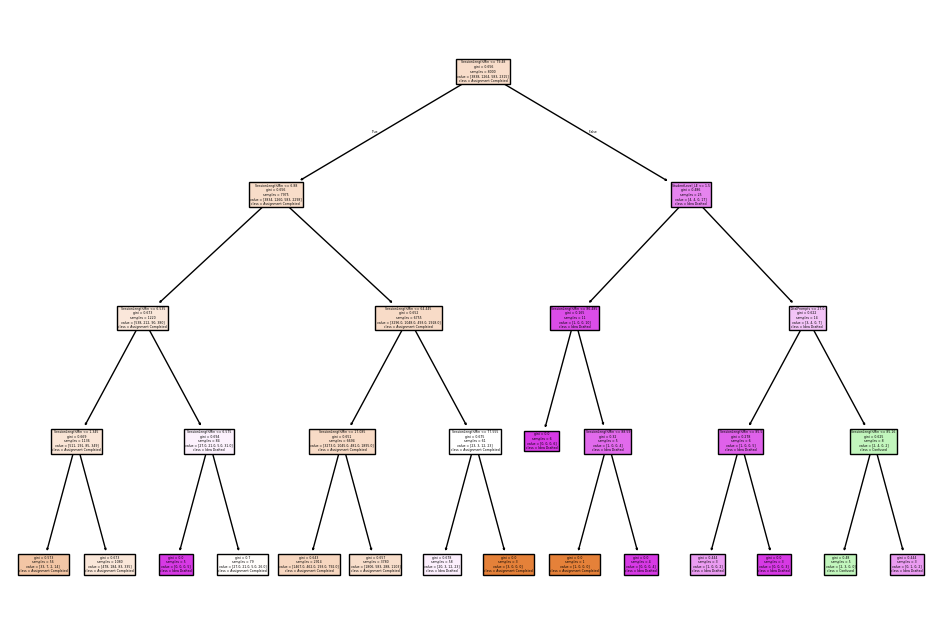

In [37]:
#Predict FinalOutcome using a Decision Tree Classifier
x1= df[["TotalPrompts", "SessionLengthMin", "StudentLevel_LE"]]
y1= df["FinalOutcome"]

x1_train, x1_test, y1_train, y1_test= train_test_split(x1, y1, test_size=0.2, random_state=42)

d_tree= DecisionTreeClassifier(max_depth=4, random_state=42)
d_tree.fit(x1_train, y1_train)

ypred1= d_tree.predict(x1_test)

print(classification_report(y1_test, ypred1))

plt.figure(figsize=(12,8))
plot_tree(d_tree, feature_names=x1.columns, class_names=d_tree.classes_, filled=True)
plt.show()



In [38]:
#Predict UsedAgain using Logistic Regression.
x2= df[["TotalPrompts", "SessionLengthMin", "StudentLevel_LE"]]
y2= df["UsedAgain"]

x2_train, x2_test, y2_train, y2_test= train_test_split(x2, y2, test_size=0.2, random_state=42)

log_reg= LogisticRegression(max_iter=2000)
log_reg.fit(x2_train, y2_train)

ypred2= log_reg.predict(x2_test)

print("Confusion Matrix:\n", confusion_matrix(y2_test, ypred2))
print("Classification Report:\n", classification_report(y2_test, ypred2))
print("ROC-AUC Score:", roc_auc_score(y2_test, log_reg.predict_proba(x2_test)[:,1]))



Confusion Matrix:
 [[   0  615]
 [   0 1385]]
Classification Report:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00       615
        True       0.69      1.00      0.82      1385

    accuracy                           0.69      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.48      0.69      0.57      2000

ROC-AUC Score: 0.4810102433154296


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [39]:
#Train a Random Forest Classifier to predict FinalOutcome.
x3= df[["TotalPrompts", "SessionLengthMin", "StudentLevel_LE"]]
y3= df["FinalOutcome"]

x3_train, x3_test, y3_train, y3_test= train_test_split(x3, y3, test_size=0.2, random_state=42)

rf_class= RandomForestClassifier(max_depth=5, random_state=42)
rf_class.fit(x3_train, y3_train)

ypred3= rf_class.predict(x3_test)   

print(classification_report(y3_test, ypred3))
print("Feature Importances:", rf_class.feature_importances_)



                      precision    recall  f1-score   support

Assignment Completed       0.46      0.99      0.63       930
            Confused       0.00      0.00      0.00       349
             Gave Up       0.00      0.00      0.00       170
        Idea Drafted       0.00      0.00      0.00       551

            accuracy                           0.46      2000
           macro avg       0.12      0.25      0.16      2000
        weighted avg       0.22      0.46      0.29      2000

Feature Importances: [0.29703109 0.60790209 0.09506682]


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
#Use KNN (K-Nearest Neighbors) to classify UsedAgain.
x4= df[["TotalPrompts", "SessionLengthMin", "StudentLevel_LE"]]
y4= df["UsedAgain"]

x4_train, x4_test, y4_train, y4_test= train_test_split(x4, y4, test_size=0.2, random_state=42)

scaler= StandardScaler()
x4_train_scaled= scaler.fit_transform(x4_train)
x4_test_scaled= scaler.transform(x4_test)

knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x4_train_scaled, y4_train)

ypred4= knn.predict(x4_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y4_test, ypred4))
print("Classification Report:\n", classification_report(y4_test, ypred4))   
print("ROC-AUC Score:", roc_auc_score(y4_test, knn.predict_proba(x4_test_scaled)[:,1]))


Confusion Matrix:
 [[  92  523]
 [ 221 1164]]
Classification Report:
               precision    recall  f1-score   support

       False       0.29      0.15      0.20       615
        True       0.69      0.84      0.76      1385

    accuracy                           0.63      2000
   macro avg       0.49      0.50      0.48      2000
weighted avg       0.57      0.63      0.59      2000

ROC-AUC Score: 0.49505327111032843


In [41]:
#Train a Naive Bayes Classifier to predict FinalOutcome.
from sklearn.naive_bayes import GaussianNB
x5= df[["TotalPrompts", "SessionLengthMin", "StudentLevel_LE"]]
y5= df["FinalOutcome"]

x5_train, x5_test, y5_train, y5_test= train_test_split(x5, y5, test_size=0.2, random_state=42)

scaler = StandardScaler()
x5_train_scaled = scaler.fit_transform(x5_train)
x5_test_scaled = scaler.transform(x5_test)

gnb= GaussianNB()
gnb.fit(x5_train, y5_train)

ypred5= gnb.predict(x5_test)

print(classification_report(y5_test, ypred5))


                      precision    recall  f1-score   support

Assignment Completed       0.47      0.96      0.63       930
            Confused       0.00      0.00      0.00       349
             Gave Up       0.00      0.00      0.00       170
        Idea Drafted       0.33      0.05      0.09       551

            accuracy                           0.46      2000
           macro avg       0.20      0.25      0.18      2000
        weighted avg       0.31      0.46      0.32      2000



c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
#Train a Naive Bayes Classifier to predict FinalOutcome.
#Using optuna



In [43]:
#Build a Gradient Boosting Classifier for UsedAgain.

x6= df[["TotalPrompts", "SessionLengthMin", "StudentLevel_LE"]]
y6= df["UsedAgain"]

x6_train, x6_test, y6_train, y6_test= train_test_split(x6, y6, test_size=0.2, random_state=42)

gbc= GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(x6_train, y6_train)

ypred6= gbc.predict(x6_test)

print("Confusion Matrix:\n", confusion_matrix(y6_test, ypred6))
print("Classification Report:\n", classification_report(y6_test, ypred6))
print("ROC-AUC Score:", roc_auc_score(y6_test, gbc.predict_proba(x6_test)[:,1]))


Confusion Matrix:
 [[   2  613]
 [   5 1380]]
Classification Report:
               precision    recall  f1-score   support

       False       0.29      0.00      0.01       615
        True       0.69      1.00      0.82      1385

    accuracy                           0.69      2000
   macro avg       0.49      0.50      0.41      2000
weighted avg       0.57      0.69      0.57      2000

ROC-AUC Score: 0.4989193155469461


In [44]:
#Apply an XGBoost Classifier to predict FinalOutcome.
#x5 = df[["TotalPrompts", "SessionLengthMin", "StudentLevel_LE"]]
#y5 = df["FinalOutcome"]

#x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, test_size=0.2, random_state=42)

#scaler = StandardScaler()
#x5_train_scaled = scaler.fit_transform(x5_train)
#x5_test_scaled = scaler.transform(x5_test)

# Use XGBClassifier instead of GaussianNB
#xgb_model = XGBClassifier(random_state=42)
#xgb_model.fit(x5_train_scaled, y5_train)

#ypred5 = xgb_model.predict(x5_test_scaled)

#print(classification_report(y5_test, ypred5))

In [45]:
#Perform cross-validation for Logistic Regression.
cv_scores = cross_val_score(log_reg, x2, y2, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Std CV Accuracy:", cv_scores.std())


Cross-Validation Accuracy Scores: [0.7065 0.7065 0.7065 0.7065 0.706 ]
Mean CV Accuracy: 0.7064
Std CV Accuracy: 0.0002000000000000224


Starting GridSearchCV...
Fitting 5 folds for each of 448 candidates, totalling 2240 fits

Best parameters found:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 15, 'splitter': 'random'}
Best cross-validation score:  0.481375

Classification Report for Best Model:
                      precision    recall  f1-score   support

Assignment Completed       0.46      0.99      0.63       930
            Confused       0.00      0.00      0.00       349
             Gave Up       0.00      0.00      0.00       170
        Idea Drafted       0.18      0.00      0.01       551

            accuracy                           0.46      2000
           macro avg       0.16      0.25      0.16      2000
        weighted avg       0.27      0.46      0.30      2000



c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


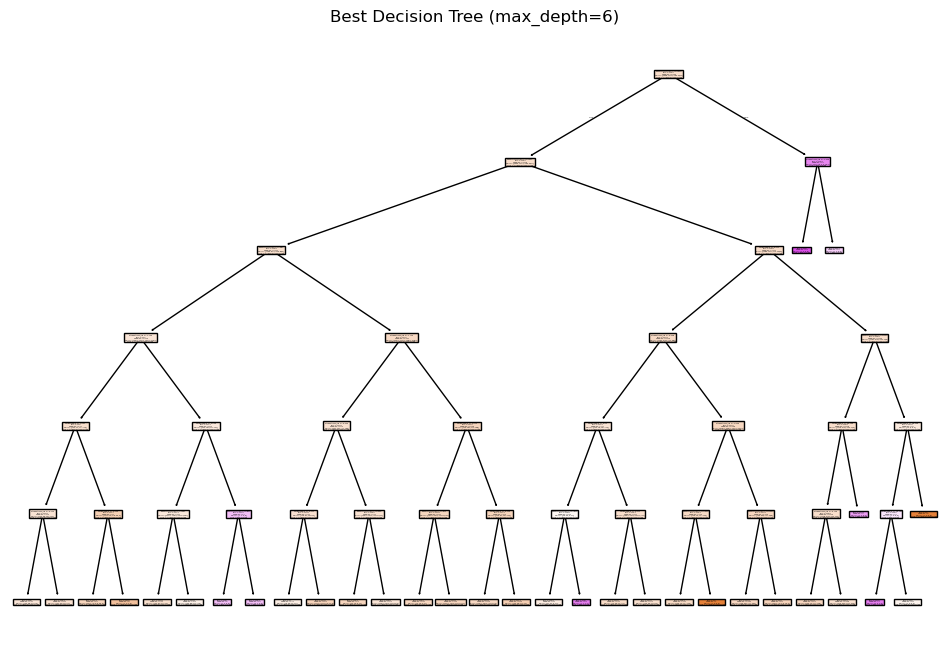

In [46]:
#Use GridSearchCV to tune hyperparameters of a Decision Tree.
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # You can change this to 'f1', 'precision', 'recall' etc.
    n_jobs=-1,  # Use all available processors
    verbose=1  # Shows progress
)

# Perform the grid search
print("Starting GridSearchCV...")
grid_search.fit(x1_train, y1_train)

# Print the best parameters and score
print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Use the best model to make predictions
best_d_tree = grid_search.best_estimator_
ypred1 = best_d_tree.predict(x1_test)

# Print classification report for the best model
print("\nClassification Report for Best Model:")
print(classification_report(y1_test, ypred1))

# Visualize the best tree
plt.figure(figsize=(12, 8))
plot_tree(best_d_tree, 
          feature_names=x1.columns, 
          class_names=best_d_tree.classes_, 
          filled=True)
plt.title(f"Best Decision Tree (max_depth={best_d_tree.get_depth()})")
plt.show()


- Gradient Boosting Classifier performed better than KNN for predicting  UsedAgain with an accuracy of 69% however, this still performed poorly considering the AUC. we should recheck the features

- The Logistic Regression, Random Forest, Naive Bayes and "XGBoost" performed almost the same with an accuracy of 46% which is very very low

- A good accuracy should be abobe 85%

- We need to recheck the XGBoost as it had isuues running.